In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
noise = 0.5 #noise factor
x_train_noisy = x_train + noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [6]:
import matplotlib.pyplot as plt

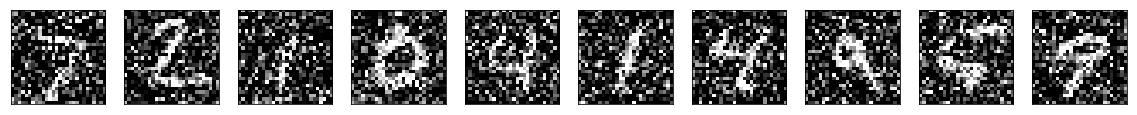

In [7]:
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [9]:
#CNN
input_img = Input(shape=(28,28,1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x =  MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)
#CNN

#DCNN
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
#Training for 1000 epochs
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
               epochs=25, batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy, x_test),
               callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Instructions for updating:
Use the retry module or similar alternatives.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1838 - val_loss: 0.1243
Epoch 2/25
60000/60000 [==============================] - 210s 4ms/step - loss: 0.1193 - val_loss: 0.1133
Epoch 3/25
60000/60000 [==============================] - 209s 3ms/step - loss: 0.1115 - val_loss: 0.1073
Epoch 4/25
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1076 - val_loss: 0.1061
Epoch 5/25
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1055 - val_loss: 0.1039
Epoch 6/25
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1043 - val_loss: 0.1025
Epoch 7/25
60000/60000 [==============================] - 267s 4ms/step - loss: 0.1031 - val_loss: 0.1012
Epoch 8/25
60000/60000 [==============================] - 270s 4ms/step - loss: 0.1022 - val_loss: 0.1037
Epoch 9/25
60000/60000 [=====

In [11]:
decoded_img = autoencoder.predict(x_test_noisy)

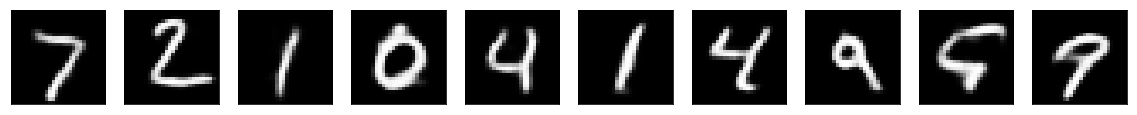

In [12]:
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
%matplotlib inline
import matplotlib as plt
%pylab
import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


c:\users\akash\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
print(decoded_img.shape)

(10000, 28, 28, 1)


In [18]:
from sklearn.decomposition import PCA

In [22]:
decoded_img_r = np.reshape(decoded_img, (10000, 784))
pca_img = PCA(64)
X_proj = pca_img.fit_transform(decoded_img_r)
print(X_proj.shape)

(10000, 64)


In [23]:
print(np.cumsum(pca_img.explained_variance_ratio_))

[ 0.11164165  0.1926716   0.26038873  0.31965387  0.37358072  0.41990694
  0.45493436  0.48776704  0.51773202  0.54285431  0.56631839  0.58912104
  0.60777026  0.62533551  0.64221156  0.65805191  0.67221552  0.68599373
  0.69879603  0.71099925  0.72234005  0.73290598  0.74295473  0.75254148
  0.76159376  0.77034944  0.77847576  0.78619778  0.79332232  0.80025971
  0.80669683  0.81286091  0.81873828  0.82439595  0.82982022  0.83486152
  0.83956409  0.84415191  0.84855002  0.85289419  0.85699672  0.86095905
  0.86476976  0.86844987  0.87192482  0.87531     0.87858897  0.88178933
  0.88486385  0.8877942   0.89055902  0.89328772  0.89589334  0.89847326
  0.90086144  0.90318817  0.90542126  0.9075985   0.90969986  0.91176057
  0.91373175  0.91565645  0.91747385  0.91927189]


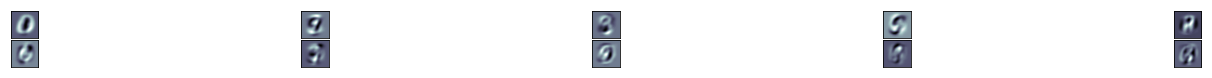

In [29]:
fig = plt.figure(figsize=(20,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
        ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
        ax.imshow(np.reshape(pca_img.components_[i,:], (28, 28)), cmap=plt.cm.bone, interpolation='nearest')
        
plt.show()